# Sales Analys

### Read all data into single file

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from functools import reduce


files = [file for file in os.listdir('./Sales_Data')]

sales = reduce(lambda acc, file: pd.concat([acc, pd.read_csv('./Sales_Data/' + file)]), files, pd.DataFrame())

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


### Rename columns

In [2]:
sales.columns = sales.columns.str.lower().str.replace(' ', '_')
sales.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

### Creating column month

In [3]:
sales['month'] = sales['order_date'].str[0:2]
sales = sales[sales['month'] != 'Or']
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


### Cast columns to numeric

In [4]:
numeric_columns = ['price_each', 'quantity_ordered', 'month']

for column in numeric_columns:
    sales[column] = pd.to_numeric(sales[column], errors='coerce')

In [5]:
sales.dtypes

order_id             object
product              object
quantity_ordered    float64
price_each          float64
order_date           object
purchase_address     object
month               float64
dtype: object

### Creating column sale

In [6]:
sales['sale'] = sales['price_each'] * sales['quantity_ordered'] 
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sale
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8.0,23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8.0,99.99
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8.0,700.00
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8.0,7.68
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8.0,7.68


### Clean up data

In [7]:
nan_df = sales[sales.isna().any(axis=1)]
nan_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sale
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sales.dropna(how='all', inplace=True)
sales.isna().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
sale                0
dtype: int64

### Duplicate check

In [9]:
sales.duplicated().sum()

264

### Remove all duplicated data

In [10]:
sales = sales.drop_duplicates().reset_index(drop=True)
sales.duplicated().sum()

0

### Creating column city

In [11]:
def get_city(address):
    full_address = address.split(',')
    city = full_address[1]
    state = full_address[2][:3]
    return f"{city} {state}"

sales['city'] = sales['purchase_address'].apply(get_city)
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sale,city
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8.0,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8.0,99.99,Dallas TX
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8.0,700.00,Portland OR
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8.0,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8.0,7.68,New York City NY


### Cast order_date to datetime

In [12]:
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sale,city
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8.0,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8.0,99.99,Dallas TX
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8.0,700.00,Portland OR
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8.0,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8.0,7.68,New York City NY


### Creating column hour

In [13]:
sales['hour'] = sales['order_date'].dt.hour
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sale,city,hour
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8.0,23.98,Seattle WA,22
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8.0,99.99,Dallas TX,15
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8.0,700.00,Portland OR,14
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8.0,7.68,Los Angeles CA,20
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8.0,7.68,New York City NY,19


## What was the best months for sales? How much was earned that month?

In [14]:
sales_by_month = sales.groupby('month').sum()
sales_by_month

,quantity_ordered,price_each,sale,hour
month,,,,
1.0,10893.0,1.810925e+06,1.821413e+06,139339
2.0,13431.0,2.186940e+06,2.200078e+06,172392
3.0,16979.0,2.789085e+06,2.804973e+06,218622
4.0,20536.0,3.366219e+06,3.389218e+06,261916
5.0,18653.0,3.133135e+06,3.150616e+06,238580
6.0,15234.0,2.560504e+06,2.576280e+06,195223
7.0,16054.0,2.631225e+06,2.646461e+06,205909
8.0,13429.0,2.226964e+06,2.241083e+06,172049
9.0,13091.0,2.081898e+06,2.094466e+06,168206


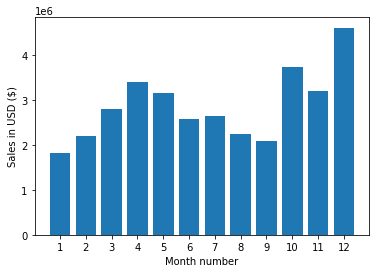

In [15]:
months = range(1, 13)

plt.bar(months, sales_by_month['sale'])
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD ($)')
plt.show()

## What city had the highest number of sales? 

In [16]:
sales_by_cities = sales.groupby('city').sum()
sales_by_cities

,quantity_ordered,price_each,month,sale,hour
city,,,,,
Atlanta GA,16584.0,2.778609e+06,104649.0,2.794199e+06,214003
Austin TX,11137.0,1.808340e+06,69720.0,1.818044e+06,141688
Boston MA,22494.0,3.634398e+06,140898.0,3.658628e+06,287705
Dallas TX,16707.0,2.750026e+06,104447.0,2.765374e+06,214078
Los Angeles CA,33247.0,5.417172e+06,208020.0,5.448304e+06,426924
New York City NY,27903.0,4.632921e+06,175557.0,4.661867e+06,357214
Portland ME,2746.0,4.467524e+05,17119.0,4.493214e+05,35152
Portland OR,11291.0,1.859836e+06,70517.0,1.870011e+06,144242
San Francisco CA,50169.0,8.204001e+06,314949.0,8.254744e+06,642269


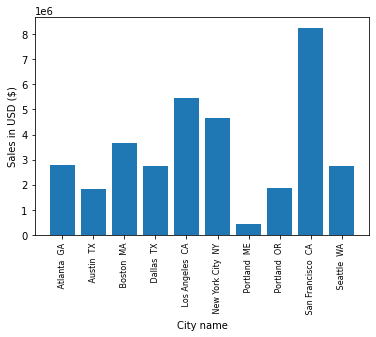

In [17]:
cities = [city for city, group in sales.groupby('city')]

plt.bar(cities, sales_by_cities['sale'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

## What time should we display advertisements to maximize likelihood of customer's buying  product?

In [18]:
sales_by_hours = sales.groupby('hour').count()
sales_by_hours

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sale,city
hour,,,,,,,,,
0,3902,3902,3902,3902,3902,3902,3902,3902,3902
1,2347,2347,2347,2347,2347,2347,2347,2347,2347
2,1242,1242,1242,1242,1242,1242,1242,1242,1242
3,830,830,830,830,830,830,830,830,830
4,852,852,852,852,852,852,852,852,852
5,1320,1320,1320,1320,1320,1320,1320,1320,1320
6,2481,2481,2481,2481,2481,2481,2481,2481,2481
7,4002,4002,4002,4002,4002,4002,4002,4002,4002
8,6252,6252,6252,6252,6252,6252,6252,6252,6252


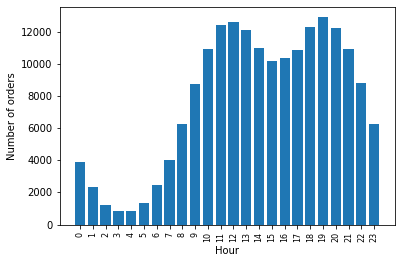

In [19]:
hours = [hour for hour, group in sales.groupby('hour')]

plt.bar(hours, sales_by_hours['sale'])
plt.xticks(hours, rotation='vertical', size=8)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()

## What products are most often sold together?

In [20]:
same_orders = sales[sales['order_id'].duplicated(keep=False)]
same_orders['grouped'] = same_orders.groupby('order_id')['product'].transform(lambda products: ','.join(products))
same_orders = same_orders[['order_id', 'grouped']].drop_duplicates().reset_index(drop=True)
same_orders

/home/pavel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,grouped
0,236716,"AA Batteries (4-pack),USB-C Charging Cable"
1,236729,"iPhone,Apple Airpods Headphones"
2,236730,"Google Phone,Wired Headphones"
3,236799,"Google Phone,Wired Headphones"
4,236829,"Vareebadd Phone,USB-C Charging Cable"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [29]:
count = Counter()

for group in same_orders['grouped']:
    group_list = group.split(',')
    count.update(Counter(combinations(group_list, 3)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 86),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]